[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order_ID          505 non-null    int64  
 1   Product_Category  481 non-null    object 
 2   Product_Price     485 non-null    float64
 3   Customer_Age      490 non-null    float64
 4   Rating            480 non-null    float64
 5   Review_Text       484 non-null    object 
 6   Order_Date        495 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 27.7+ KB
None
First Few Rows of Dataset:
   Order_ID Product_Category  Product_Price  Customer_Age  Rating  \
0         1         Clothing         3262.0          58.0     3.0   
1         2         Clothing          214.0          20.0     3.0   
2         3       Home Decor         3429.0          51.0     2.0   
3         4            Books         4568.0          35.0     3.0   
4         5 

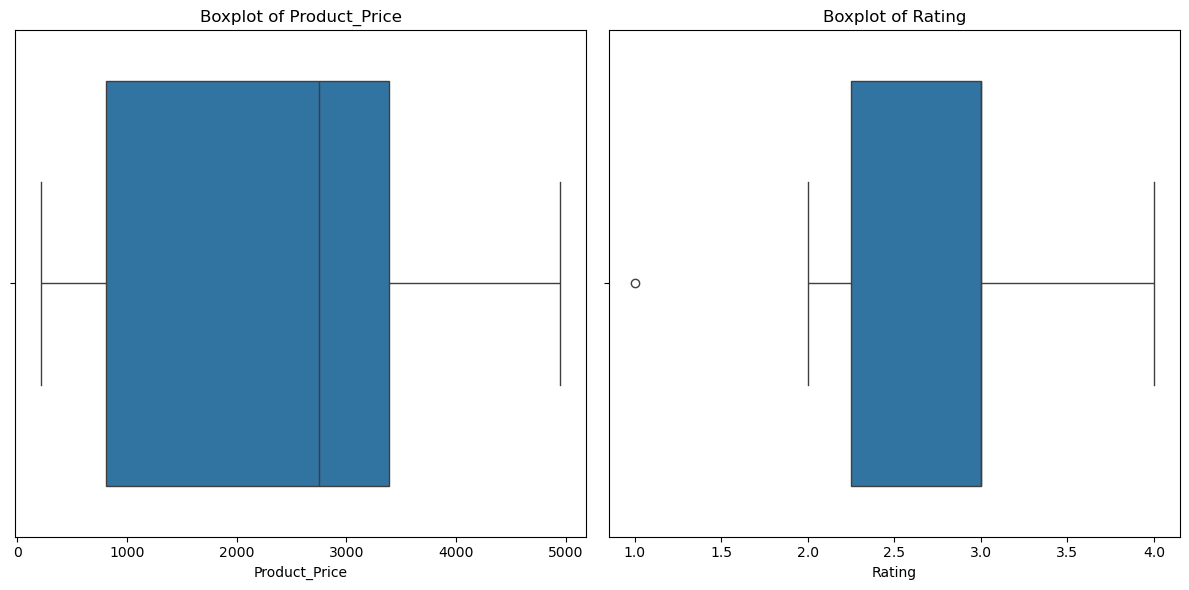

Missing Values After Cleaning:
Order_ID            0
Product_Category    0
Product_Price       0
Customer_Age        0
Rating              0
Review_Text         0
Order_Date          0
dtype: int64
Number of duplicate reviews after cleaning: 0
Cleaned dataset saved as 'cleaned_ecommerce_customer_reviews.csv'


In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')

df = pd.read_csv('Day 20_E-Commerce_Data.csv')
print("Dataset Information:")
print(df.info()) 

print("First Few Rows of Dataset:")
print(df.head())  # View the first few rows to get an idea of the data structure

# Step 4: Handle Missing Values
# Check for missing data
missing_data = df.isna().sum()
missing_percentage = df.isna().mean() * 100

print("Missing Values Count:")
print(missing_data)

print("Percentage of Missing Values:")
print(missing_percentage)

# 4.1: Impute Missing Numerical Columns (e.g., Customer_Age)
numerical_cols = ['Customer_Age', 'Rating']  # Numerical columns that may have missing values
num_imputer = SimpleImputer(strategy='median')  # Using median for numerical columns
df[numerical_cols] = num_imputer.fit_transform(df[numerical_cols])

# 4.2: Impute Missing Categorical Columns (e.g., Review_Text)
# Impute missing Review_Text with an appropriate placeholder using NLP-based techniques
def impute_text(text):
    if pd.isna(text):
        return "No Review Provided"
    else:
        return text

df['Review_Text'] = df['Review_Text'].apply(impute_text)

# Step 5: Detect and Remove Duplicates
# Identify duplicate reviews (based on Review_Text)
duplicates = df.duplicated(subset=['Review_Text']).sum()
print(f"Number of duplicate reviews: {duplicates}")

# Remove duplicates based on the 'Review_Text' column
df = df.drop_duplicates(subset=['Review_Text'])

# Step 6: Handle Inconsistent Data
# 6.1: Standardize Rating values to ensure they are between 1 and 5
df['Rating'] = df['Rating'].clip(lower=1, upper=5)

# 6.2: Correct spelling inconsistencies in Product_Category
df['Product_Category'] = df['Product_Category'].replace({
    'eletronics': 'Electronics',
    'clothes': 'Clothing',
    'home deco': 'Home Decor',
    'cosmetics': 'Cosmetics'
    # Add more replacements as necessary
})

# Step 7: Identify and Handle Outliers
# Visualize Product_Price and Rating outliers using boxplots
plt.figure(figsize=(12, 6))

# Boxplot for Product_Price
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='Product_Price')
plt.title('Boxplot of Product_Price')

# Boxplot for Rating
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Rating')
plt.title('Boxplot of Rating')

plt.tight_layout()
plt.show()

# Apply transformation techniques to handle outliers (if necessary)
# Example: Capping outliers in Product_Price using IQR
Q1_price = df['Product_Price'].quantile(0.25)
Q3_price = df['Product_Price'].quantile(0.75)
IQR_price = Q3_price - Q1_price

# Capping outliers beyond 1.5 * IQR
df['Product_Price'] = df['Product_Price'].clip(lower=Q1_price - 1.5 * IQR_price, upper=Q3_price + 1.5 * IQR_price)

# Step 8: Prepare Data for Analysis
# Convert categorical data (e.g., Product_Category) into numerical format using Label Encoding
le = LabelEncoder()
df['Product_Category'] = le.fit_transform(df['Product_Category'])

# Normalize numerical columns (e.g., Product_Price)
scaler = MinMaxScaler()
df[['Product_Price']] = scaler.fit_transform(df[['Product_Price']])

# Step 9: Data Validation
# Check for missing values after cleaning
missing_data_after = df.isna().sum()
print("Missing Values After Cleaning:")
print(missing_data_after)

# Ensure no duplicates remain
duplicates_after = df.duplicated(subset=['Review_Text']).sum()
print(f"Number of duplicate reviews after cleaning: {duplicates_after}")

# Step 10: Final Data Export
# Save the cleaned dataset for further analysis
df.to_csv('cleaned_ecommerce_customer_reviews.csv', index=False)

print("Cleaned dataset saved as 'cleaned_ecommerce_customer_reviews.csv'")
